# El objetivo de este programa es hacer una herramienta para ver que vehículos de segunda mano se buscan en España.

# The objective of this program is to make a tool to see which second-hand vehicles are looking for in Spain.

### Para conseguir esto, utilizaremos Google Trends. Aunque no podamos sacar el total de búsquedas, se pueden sacar comparativas entre marcas y modelos.
### To achieve this, we will use Google Trends. Although we cannot get the total search, comparatives can be taken between brands and models.

¿Necesitas ayuda?
Do you need help?

LinkedIn contact: https://www.linkedin.com/in/carlos-rodriguez-rebenaque-04a624208/

In [23]:
#Instalar pytrends // Installing pytrends
#https://pypi.org/project/pytrends/

!pip install pytrends

In [24]:
#Importamos las librerias 
import pandas as pd
from pytrends.request import TrendReq
import numpy as np

#Segmentamos por lengua española, en la que buscarán los compradores del país. // We filter by the Spanish language, in which the country's buyers will seek.
pytrend=TrendReq(hl="es",timeout=None)

Primero vamos a segmentar por marca, escogemos las marcas más comunes y les añadimos "segunda mano". 

First, we are going to filter by brand, we choose the most common brands and add "second hand."

In [25]:
lista_marcas: str=[ "seat segunda mano", "audi segunda mano", "bmw segunda mano", "citroen segunda mano", "fiat segunda mano", "ford segunda mano", "dacia segunda mano", "honda segunda mano", "hyundai segunda mano", "kia segunda mano", "lexus segunda mano",
                    "mazda segunda mano", "mercedes segunda mano", "mini segunda mano",  "nissan segunda mano", "opel segunda mano", "peugeot segunda mano", "renault segunda mano", "skoda segunda mano", "toyota segunda mano", "wolkswagen segunda mano", "volvo segunda mano"]

In [26]:
#El número máximo de comparativa es 5, partimos la lista para tener <5 por lista. // The maximum comparison number is 5, we split the list to have <5 per list.
final_list = np.array_split(lista_marcas,5)

print("The Final List is:", final_list)


The Final List is: [array(['seat segunda mano', 'audi segunda mano', 'bmw segunda mano',
       'citroen segunda mano', 'fiat segunda mano'], dtype='<U23'), array(['ford segunda mano', 'dacia segunda mano', 'honda segunda mano',
       'hyundai segunda mano', 'kia segunda mano'], dtype='<U23'), array(['lexus segunda mano', 'mazda segunda mano',
       'mercedes segunda mano', 'mini segunda mano'], dtype='<U23'), array(['nissan segunda mano', 'opel segunda mano', 'peugeot segunda mano',
       'renault segunda mano'], dtype='<U23'), array(['skoda segunda mano', 'toyota segunda mano',
       'wolkswagen segunda mano', 'volvo segunda mano'], dtype='<U23')]


'\nSi se desea por comunidad autónoma:\npytrend.interest_by_region(resolution="COUNTRY")\n\nIf you want to segment by autonomous community:\npytrend.interest_by_region(resolution="COUNTRY")\n\n'

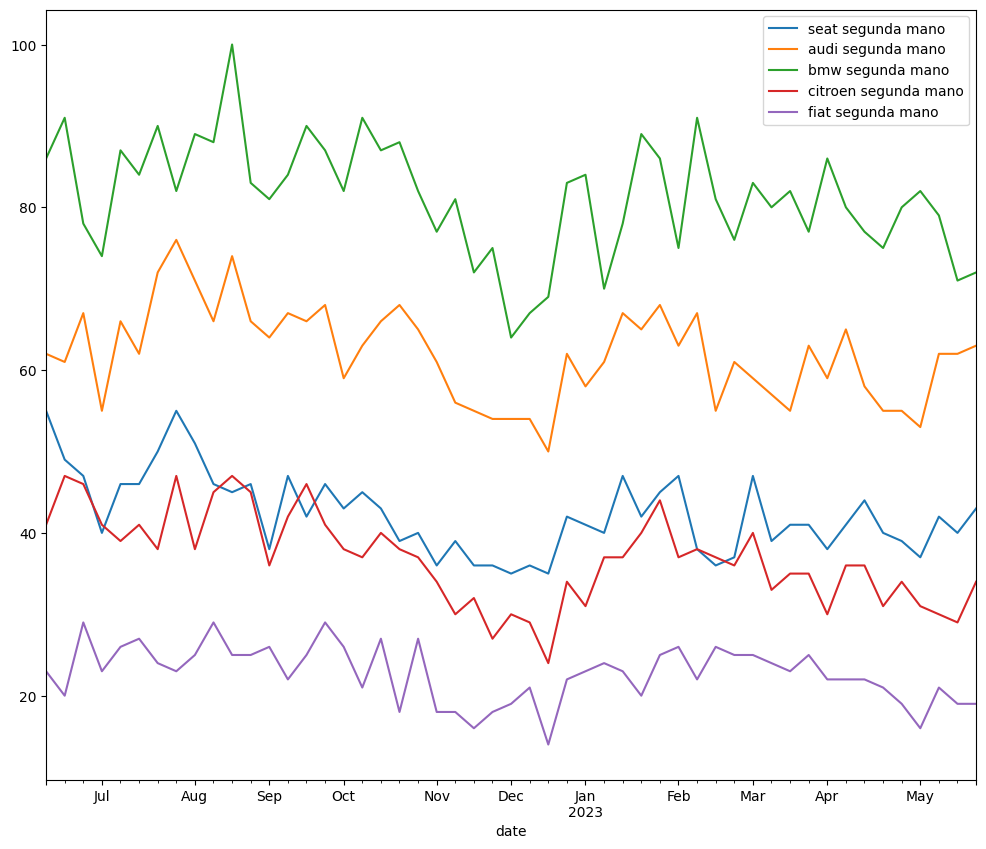

In [27]:
#Definimos la petición por lista, en el último año y solo en España. //We define the request by list, in the last year and only in Spain.
pytrend.build_payload(kw_list=final_list[0], timeframe="today 12-m", geo="ES")


grafico = pytrend.interest_over_time()
grafico.plot(figsize=(12, 10), y=final_list[0])

"""
Si se desea por comunidad autónoma:
pytrend.interest_by_region(resolution="COUNTRY")

If you want to segment by autonomous community:
pytrend.interest_by_region(resolution="COUNTRY")

"""

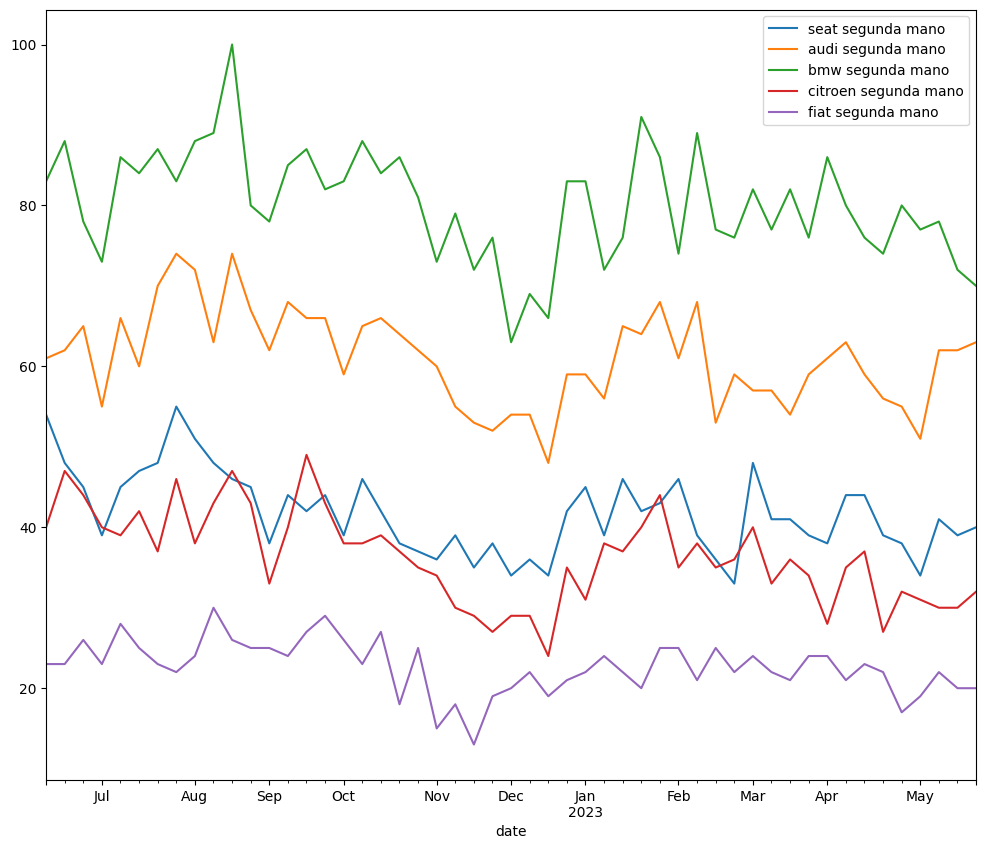

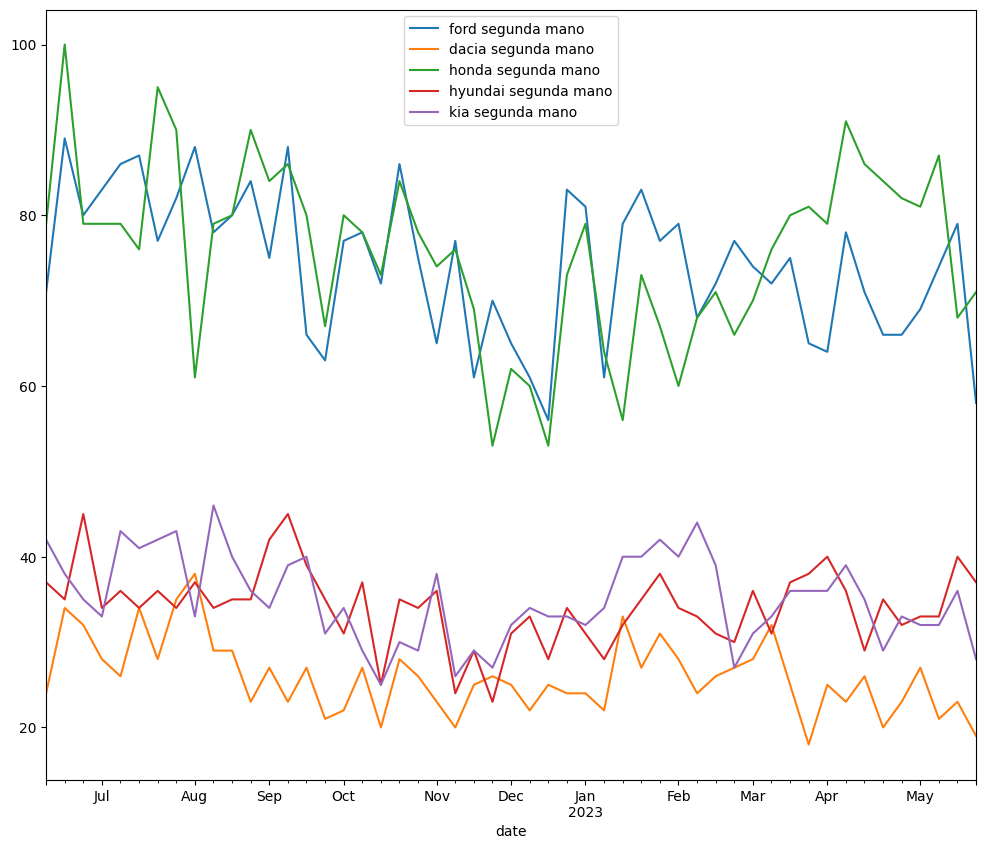

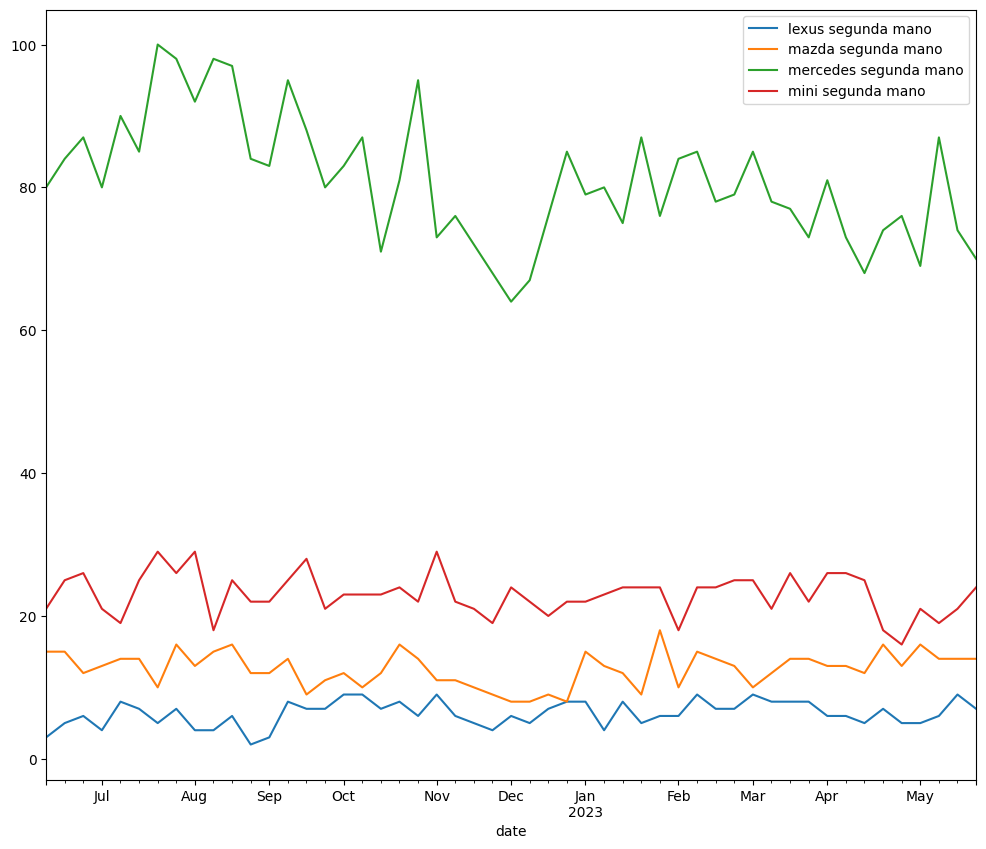

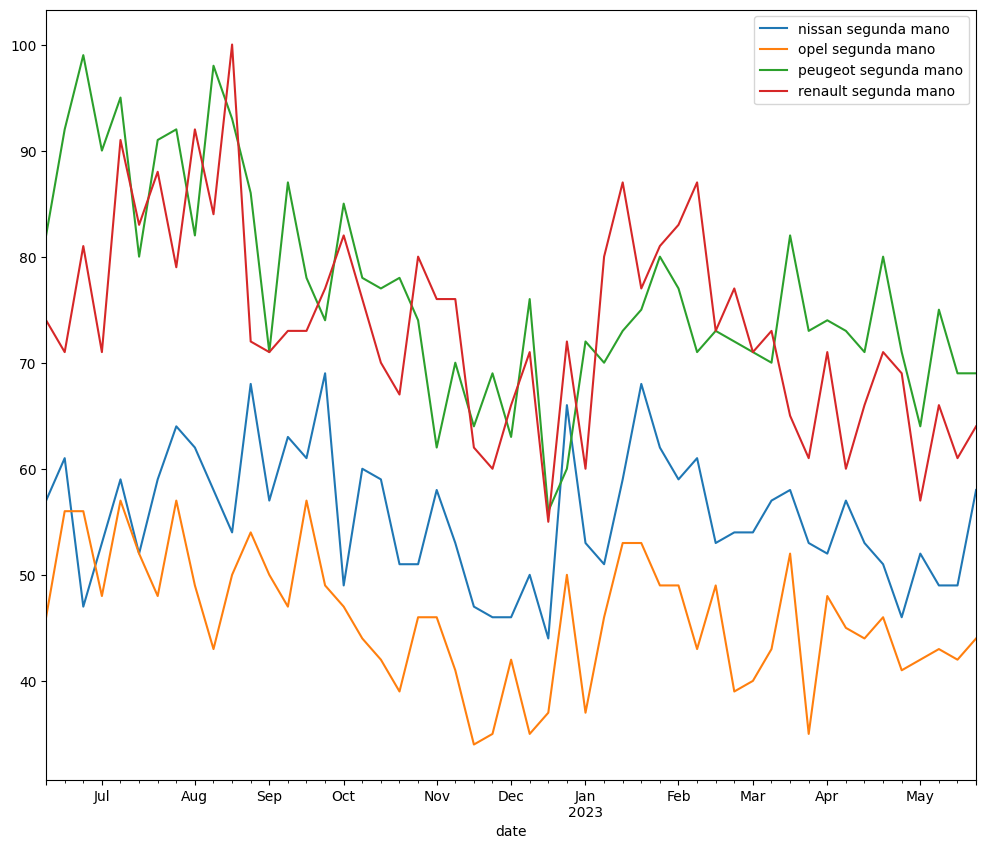

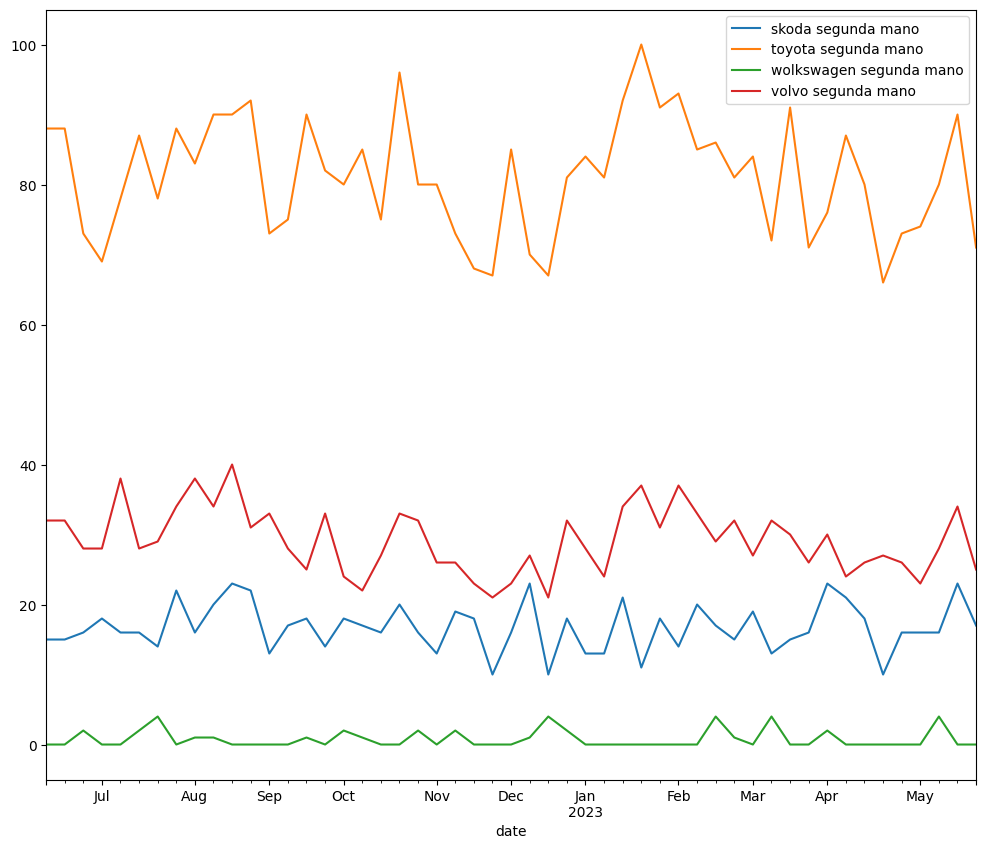

In [28]:
for i in range(5):
    pytrend.build_payload(kw_list=final_list[i], timeframe="today 12-m", geo="ES")


    grafico = pytrend.interest_over_time()
    grafico.plot(figsize=(12, 10), y=final_list[i])



Ahora que hemos visto las marcas más buscadas, vamos a intentar seleccionar las 6 más buscadas.

Now that we have seen the most wanted brands, we are going to choose 6.

In [29]:
#Lista de más buscadas // Most wanted
most_wanted: str=["toyota segunda mano","renault segunda mano","peugeot segunda mano","mercedes segunda mano","ford segunda mano","honda segunda mano","bmw segunda mano","audi segunda mano"]

#Dividimos // Split
most_wanted = np.array_split(most_wanted,2)

print(most_wanted)

[array(['toyota segunda mano', 'renault segunda mano',
       'peugeot segunda mano', 'mercedes segunda mano'], dtype='<U21'), array(['ford segunda mano', 'honda segunda mano', 'bmw segunda mano',
       'audi segunda mano'], dtype='<U21')]


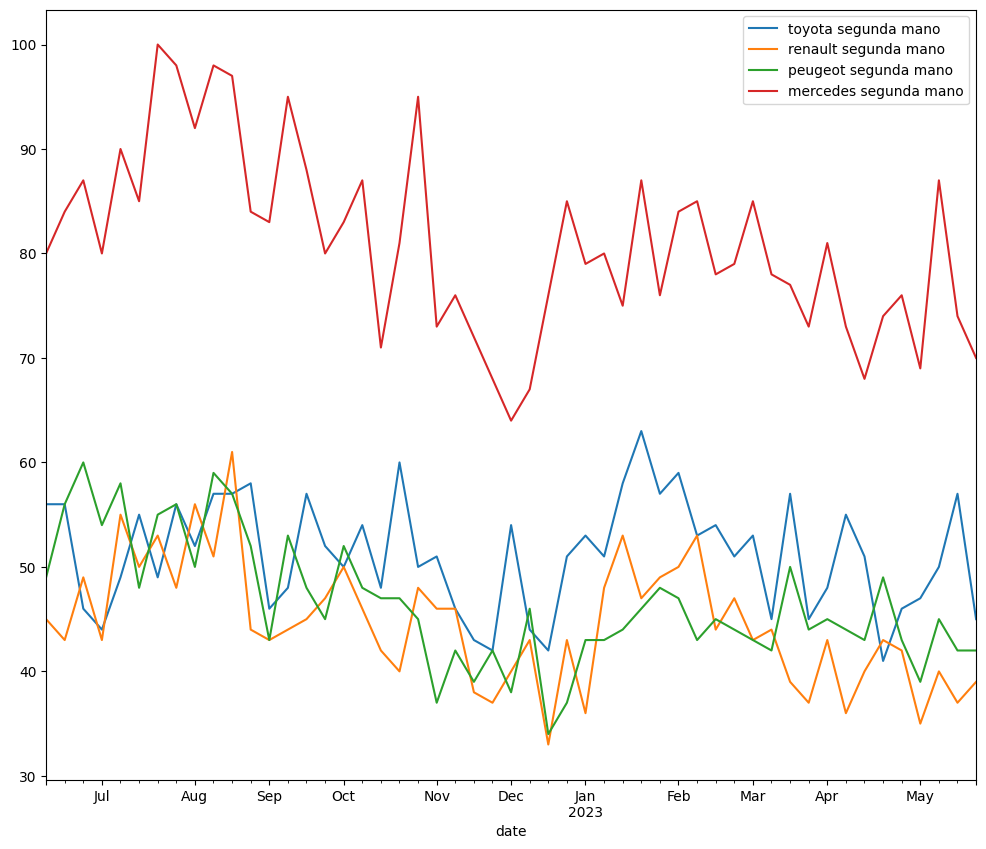

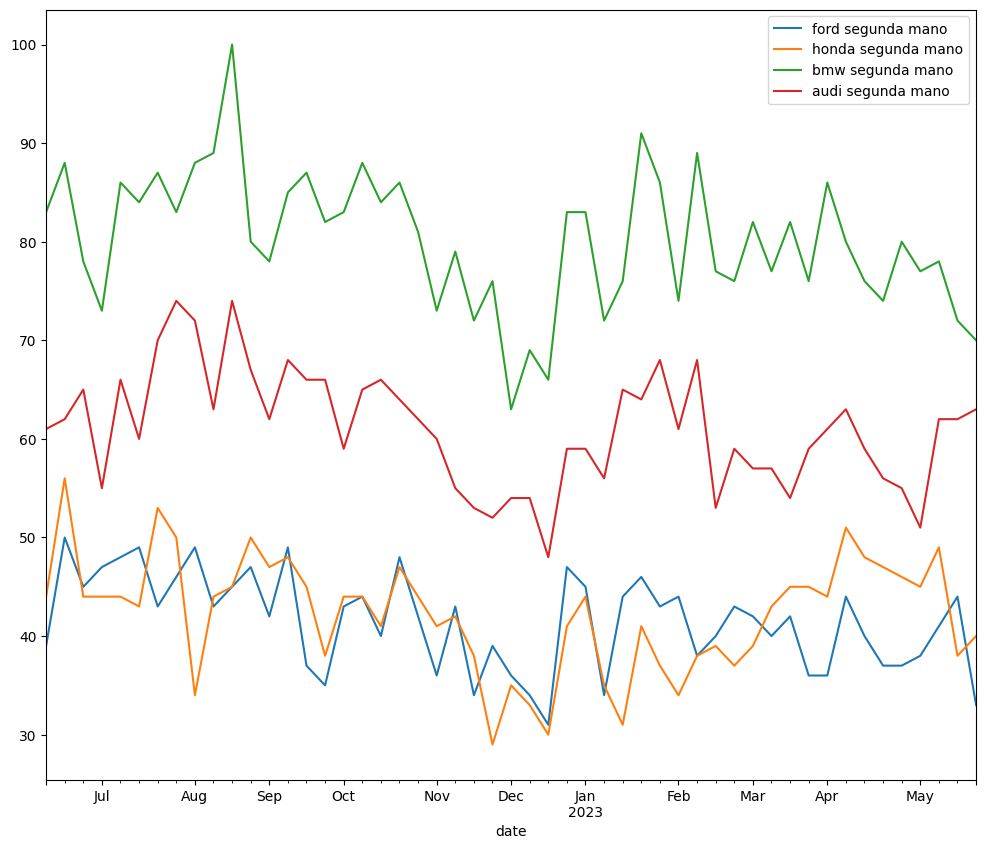

In [30]:
#Misma representación // Same visualization
for i in range(2):
    pytrend.build_payload(kw_list=most_wanted[i], timeframe="today 12-m", geo="ES")


    grafico = pytrend.interest_over_time()
    grafico.plot(figsize=(12, 10), y=most_wanted[i])

<Axes: xlabel='date'>

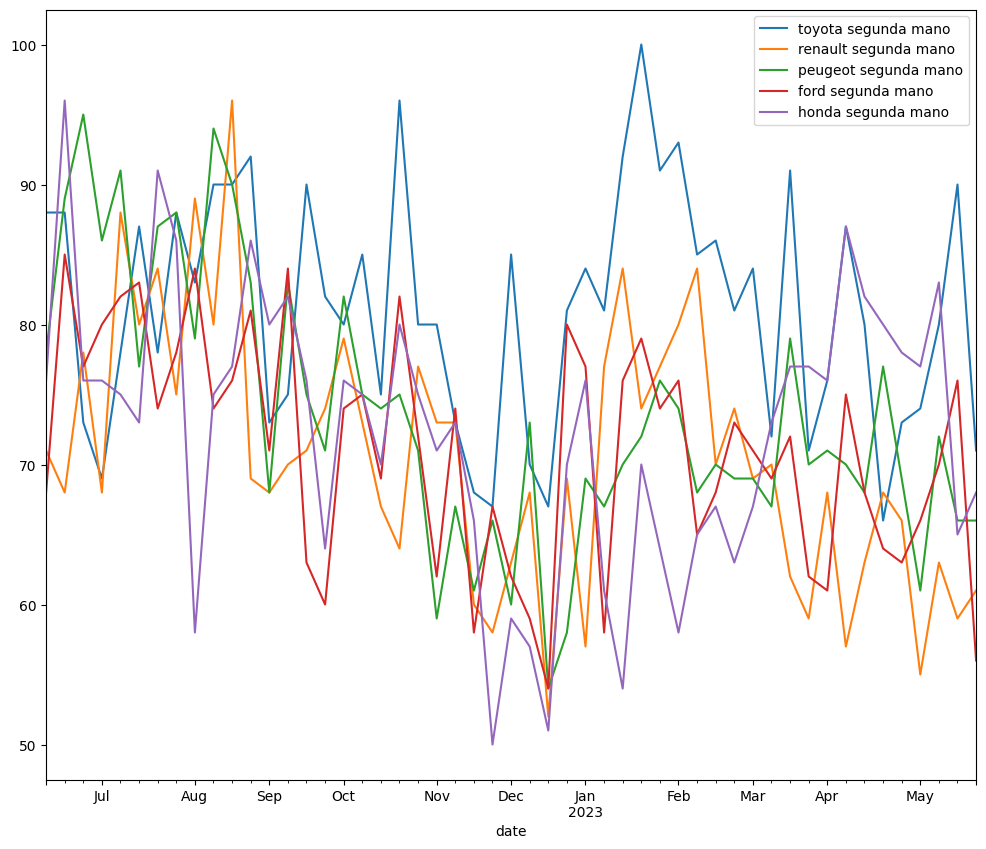

In [31]:
# Mercedes, bmw y audi. Faltan 3 // We need to compare the others.
#Lista de más buscadas // Most wanted
most_wanted_2: str=["toyota segunda mano","renault segunda mano","peugeot segunda mano","ford segunda mano","honda segunda mano"]


pytrend.build_payload(kw_list=most_wanted_2, timeframe="today 12-m", geo="ES")


grafico = pytrend.interest_over_time()
grafico.plot(figsize=(12, 10), y=most_wanted_2)



Estos resultados señalan que hay una diferencia considerable entre las 3 marcas más buscadas y el resto, cuyas diferencias serán relativamente pequeñas, incluso en las descartadas inicialmente.

These results indicate that there is a considerable difference between the 3 most wanted brands and the rest, whose differences will be relatively small, even in those initially discarded.

Aquí dejo una lista con modelos, ¡haz las pruebas que consideres!

Some car model lists, Do the tests you consider!

In [32]:
#Preparamos listas con los modelos más famosos de cada marca seleccionada. // We prepare lists with the most famous models of each selected brand.

#RECUERDA no puedes comparar más de 5. // REMINDER MAX NUMBER = 5

lista_seats: str =["seat ibiza", "seat leon", "seat alhambra", "seat arona", "seat ateca", "seat tarraco", "seat leon"]
lista_audi: str = ["audi a1", "audi a3", "audi a4", "audi a5", "audi a6","audi a7", "audi a8", "audi q2","audi q3", "audi q5", "audi q7"]
lista_bmw: str= ["bmw serie 1", "bmw serie 2", "bmw serie 3", "bmw serie 4", "bmw serie 5", "bmw serie 6", "bmw serie 7", "bmw serie 8", 
                 "bmw x1", "bmw x2", "bmw x3", "bmw x4", "bmw x5", "bmw x6", "bmw x7"]
lista_citroen: str=["citroen berlingo", "citroen c3", "citroen c4", "citroen c5", "citroen jumper", "citroen jumpy"]
lista_fiat: str=["fiat 500", "fiat 500L", "fiat 500X", "fiat doblo", "fiat ducato", "fiat panda", "fiat scudo", "fiat tipo"]
lista_ford: str=["ford ecosport", "ford explorer", "ford fiesta", "ford focus", "ford galaxy", "ford kuga", "ford mondeo", "ford ranger"]

### Otra funcionalidad muy útil es sacar las búsquedas relacionadas, vamos a ver como se hace.

### Another very useful functionality is to get related searches, we are going to see how it is done.

In [33]:
#Este método obtendrá las búsquedas relaccionadas del build_payload ejecutado. // This method will obtain the revoked searches of the Build_Payload executed.
finalists:str=["audi segunda mano", "mercedes segunda mano", "bmw segunda mano"]
pytrend.build_payload(kw_list=most_wanted_2, cat=47, timeframe="today 12-m", geo="ES")
related_queries = pytrend.related_queries()

In [34]:
#Esta funcion convertirá las busquedas relacionadas a un formato más legible y eliminará las que tengan valores pequeños.

#This function will convert the search related to a more readable format and eliminate those that have small values.

def df_related_queries(related_queries):

    data = []

    for marca, valores in related_queries.items():
        contenido = valores['top']
        queries = contenido['query']
        values = contenido['value']
        data.extend(zip(queries, values, [marca] * len(queries)))

    df = pd.DataFrame(data, columns=['Query', 'Value', 'Marca'])
    df = df[df['Value'] >= 30]  # Filtrar las entradas con query >= 30
    df = df.sort_values(by='Value', ascending=False)

    # Establecer opciones de visualización para una mejor legibilidad // Better display configuration.
    pd.set_option('display.max_colwidth', None)
    pd.set_option('display.expand_frame_repr', False)

    return df



In [35]:
# Imprimir el DataFrame con un formato de tabla más ordenado. // Printing the table
relateds=df_related_queries(related_queries)
print(relateds.to_string(index=False))

                           Query  Value                Marca
          toyota de segunda mano    100  toyota segunda mano
         renault de segunda mano    100 renault segunda mano
                      ford focus    100    ford segunda mano
         peugeot de segunda mano    100 peugeot segunda mano
                       honda 125    100   honda segunda mano
          honda 125 segunda mano     99   honda segunda mano
         ford focus segunda mano     99    ford segunda mano
       ford transit segunda mano     98    ford segunda mano
              motos segunda mano     97   honda segunda mano
                     honda motos     97   honda segunda mano
                    ford transit     97    ford segunda mano
        coches ford segunda mano     89    ford segunda mano
             toyota land cruiser     70  toyota segunda mano
       land cruiser segunda mano     70  toyota segunda mano
toyota land cruiser segunda mano     70  toyota segunda mano
      coches toyota segu

Se aprecia que las búsquedas semejantes generalmente son modelos de otras marcas.

It is appreciated that similar searches usually are models of other brands.